In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Data augmentation
data_augmentation = Sequential([
    keras.layers.RandomFlip('horizontal_and_vertical'),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.2),
    keras.layers.RandomContrast(0.2)
])

In [3]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='C:/Users/maule/Downloads/archive/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='C:/Users/maule/Downloads/archive/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
# Normalize
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process).map(lambda x, y: (data_augmentation(x, training=True), y))
validation_ds = validation_ds.map(process)

In [5]:
# Create CNN Model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    
    Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    
    Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [7]:
# Adjust the learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 863s 1s/step - loss: 0.7223 - accuracy: 0.5745 - val_loss: 0.6174 - val_accuracy: 0.6296
Epoch 2/10
625/625 [==============================] - 888s 1s/step - loss: 0.6598 - accuracy: 0.5990 - val_loss: 0.6963 - val_accuracy: 0.6064
Epoch 3/10
625/625 [==============================] - 865s 1s/step - loss: 0.6467 - accuracy: 0.6204 - val_loss: 0.6676 - val_accuracy: 0.6650
Epoch 4/10
625/625 [==============================] - 852s 1s/step - loss: 0.6394 - accuracy: 0.6244 - val_loss: 0.5977 - val_accuracy: 0.6360
Epoch 5/10
625/625 [==============================] - 845s 1s/step - loss: 0.6240 - accuracy: 0.6370 - val_loss: 0.5769 - val_accuracy: 0.6778
Epoch 6/10
625/625 [==============================] - 847s 1s/step - loss: 0.6073 - accuracy: 0.6484 - val_loss: 0.5818 - val_accuracy: 0.6536
Epoch 7/10
625/625 [==============================] - 848s 1s/step - loss: 0.6044 - accuracy: 0.6629 - val_loss: 0.5714 - val_accuracy: 0.7094

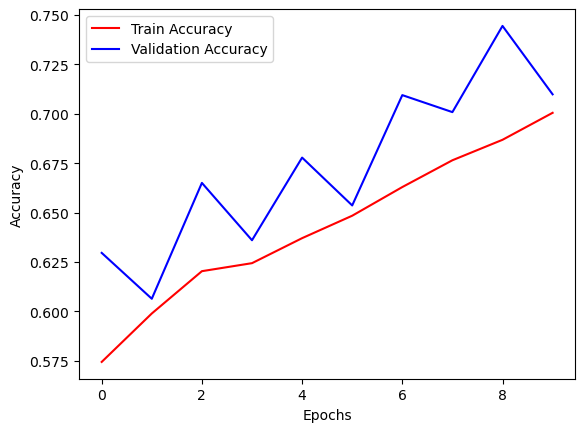

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

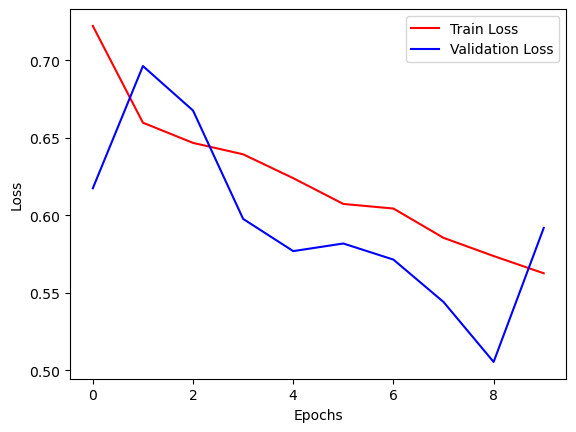

In [13]:
plt.plot(history.history['loss'], color='red', label='Train Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
#Ways to reduce overfitting

#Add more data
#Data augmentation
#L1/L2 Regularizer
#Dropout
#Batch Norm
#Reduce Complexity

In [15]:
pip install opencv-python

In [16]:
import cv2

In [45]:
# Load and preprocess the test image
test_img = cv2.imread('C:/Users/maule/Downloads/dog5.jpg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
test_img = cv2.resize(test_img, (256, 256))
test_img = test_img / 255.0  # Normalize
test_input = test_img.reshape((1, 256, 256, 3))

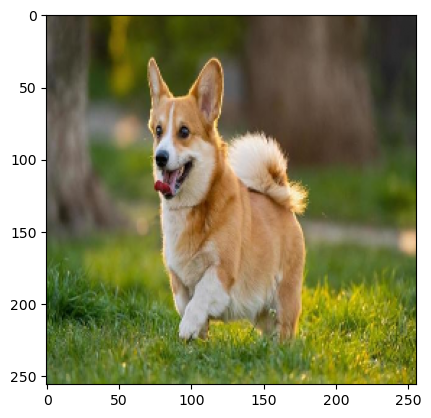

In [46]:
plt.imshow(test_img)

In [48]:
# Make prediction
prediction = model.predict(test_input)
print("Prediction: ", "Dog" if prediction[0][0] > 0.5 else "Cat")

1/1 [==============================] - 0s 325ms/step
Prediction:  Dog
